# vta MC2: Fourier Transformation


## Voraussetzungen


In [12]:
%pip install numpy
%pip install matplotlib
%pip install librosa



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # for better quality plots


## Aufgabe 1

In dieser Aufgabe implementieren Sie die Berechnung der Fourier-Approximation in numpy (kein fft).


**(a)** Implementieren Sie mit numpy eine Methode zur Berechnung der $k$-ten Fourier-Komponente einer Funktion, gegeben durch Arrays $x$ und $y$, mithilfe der Trapezregel (`np.trapz`).


$${\displaystyle c_{n}={\frac {1}{P}}\int _{-P/2}^{P/2}s(x)e^{-{\frac {2\pi inx}{P}}}\,dx\qquad {\text{for all integers}}~n}$$


In [32]:
def fourier_coefficient(x, y, k):
    P = 2 * x.max()
    return (1 / P) * np.trapz(y * np.exp(-1j * 2 * np.pi * k * x / P), x)


**(b)** Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation $f_{app}$ mit einer gegebenen Anzahl ($2m + 1$) von Fourier-Komponenten.


$${\displaystyle s(x)=\sum _{n=-\infty }^{\infty }c_{n}\cdot e^{\frac {2\pi inx}{P}}}$$


In [28]:
def fourier_approximation(f, a, N, m):
    """
    Computes the Fourier approximation for a function f on an interval [-a,a] (a>0) with 2m+1 components.
    f -- function to approximate
    a -- scale of the function defined on [-a,a]
    N -- number of x-grid points
    m -- parameter specifying the number of Fourier components 2m+1
    returns x,y,yappr,coeff (x-grid, function values on x-grid, approximate function values on x-grid, Fourier coefficients)
    """
    if a <= 0:
        raise Exception("'a' must be positive")

    x = np.linspace(-a, a, N)
    y = f(x)

    P = 2 * a
    f_approx = np.array(
        [
            fourier_coefficient(x, y, k) * np.exp((1j * 2 * np.pi * k * x) / P)
            for k in range(-m, m + 1)
        ]
    )
    f_approx = np.sum(f_approx, axis=0)

    return x, y, f_approx.real

**(c)** Nähern Sie die Funktion $f_1(x) = \frac{1}{{e^x + e^{-x}}}$ auf dem Intervall $[-3, 3]$ (Auflösung: $N = 600$ Schritte) mit verschiedenen Anzahlen von Komponenten $2m + 1$. Plotten Sie den Vergleich zur Originalfunktion $f$.


In [36]:
def f1(x):
    return 1 / (np.exp(x) + np.exp(-x))


a = 3  # scale of the function defined on [-a,a]
N = 600  # number of x-grid points


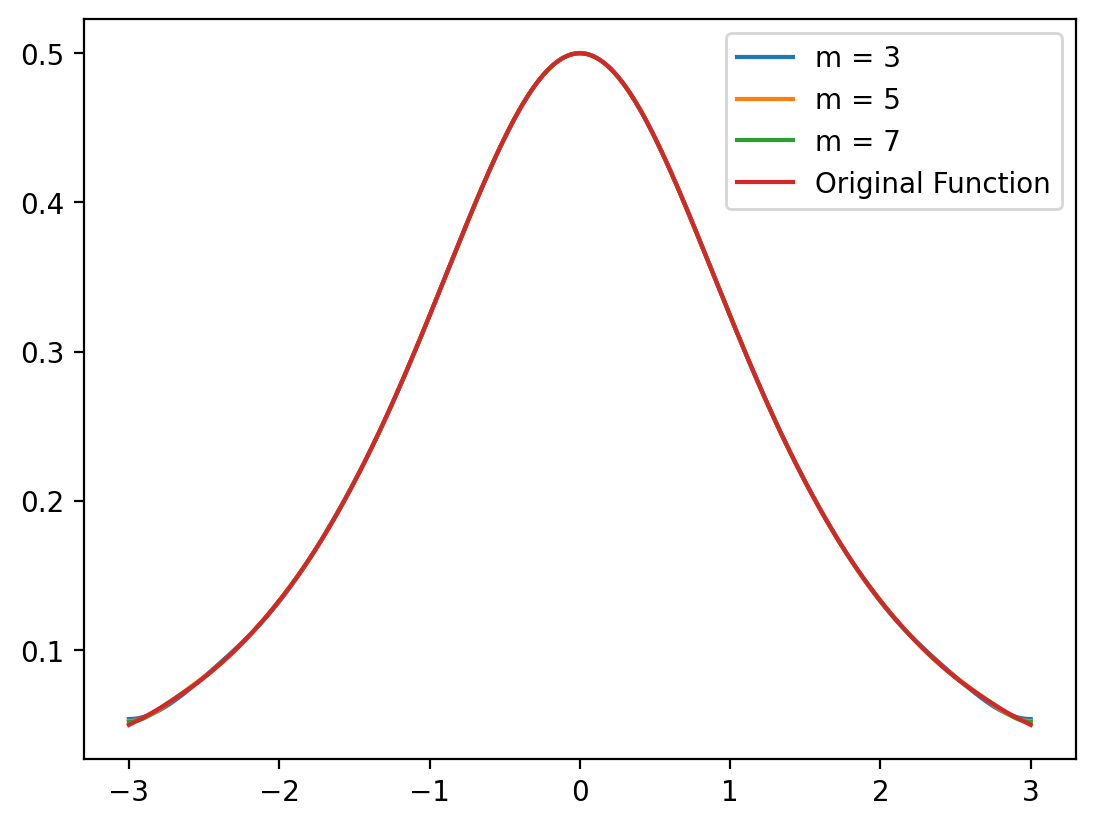

In [39]:
m_values = [2 * m + 1 for m in range(1, 4)]

for m in m_values:
    x, y, f_app = fourier_approximation(f=f1, a=3, N=600, m=2 * m + 1)
    plt.plot(x, f_app, label=f"m = {m}")

# Plot the original function
plt.plot(x, y, label="Original Function")

plt.legend()
plt.show()


**(d)** Bestimmen Sie die Anzahl der Fourier-Komponenten, die benötigt werden, um eine Approximation mit höchstens $0,1$% relativen Fehler zu erhalten.


$$
\delta=\left|\frac{v_A-v_E}{v_E}\right| \cdot 100 \%
$$


In [65]:
def rel_error(y, f_app):
    return np.linalg.norm(y - f_app) / np.linalg.norm(y)

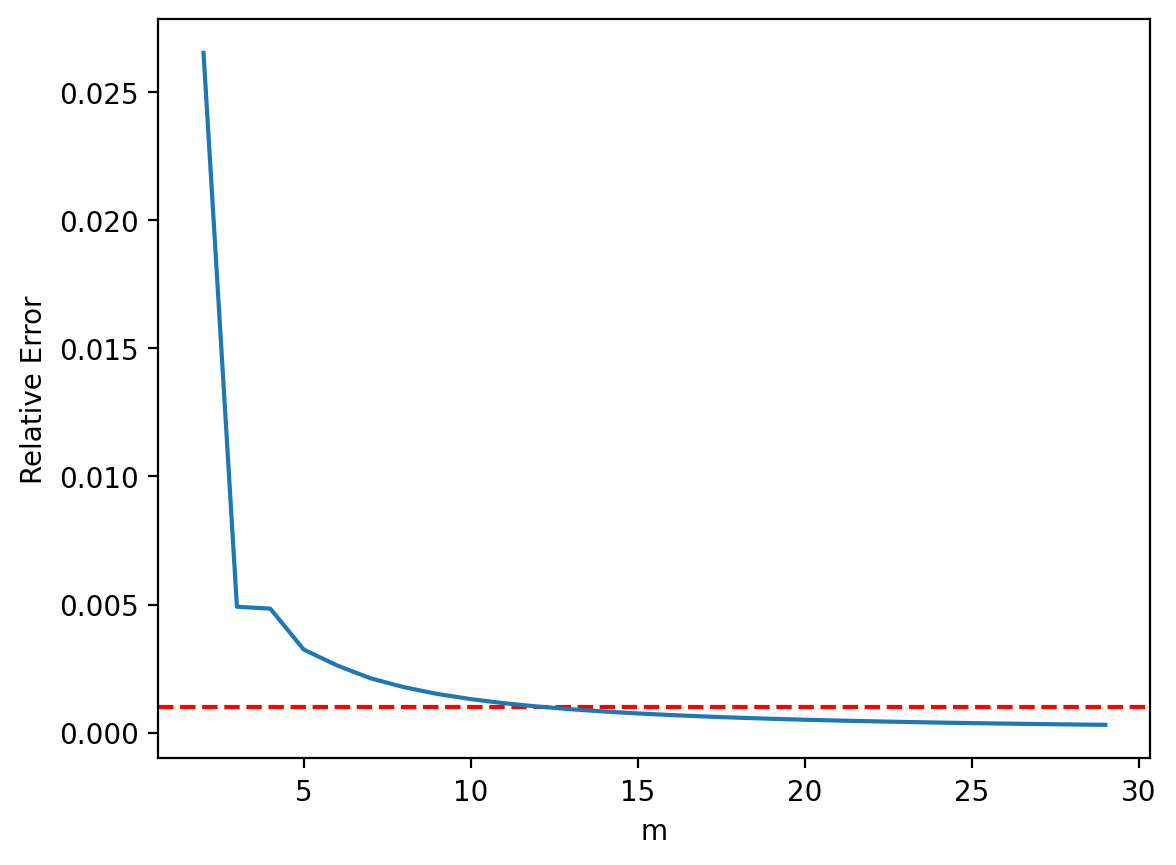

In [66]:
m_values = [m for m in range(2, 30)]
rel_errors = []

for m in m_values:
    x, y, f_app = fourier_approximation(f=f1, a=a, N=600, m=m)
    rel_errors.append(rel_error(y, f_app))

plt.axhline(y=0.001, color="r", linestyle="--")

plt.plot(m_values, rel_errors)
plt.xlabel("m")
plt.ylabel("Relative Error")
plt.show()


**(e)** Versuchen Sie die Funktionen $f_2(x) = e^x$ und $f_3(x) = e^{abs(x)}$ auf dem Intervall ($[-3, 3]$) (Auflösung: \(N = 600\) Schritte) mit einem $0,1$%igen Approximationsfehler anzunähern. Beschreiben und erklären Sie die Unterschiede.


## Aufgabe 2

In dieser Aufgabe wenden Sie die Fourier-Analyse auf Sonnenfleckendaten an (sunspots.txt). Sie
dürfen dafür die fft routine von numpy oder scipy verwenden.

- **(a)** Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung.
  Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.

- **(b)** Können Sie weitere Perioden in den Sonnenfleck-Daten mithilfe des Fourier-Spektrums
  finden?

- **(c)** Entfernen Sie einige Komponenten im Fourier-Spektrum und führen dann eine Rücktrans-
  formation durch:

  - grössten Komponenten entfernen (k > 20)
  - kleinsten Komponenten entfernen (k < 5)

  Beschreiben und erklären Sie die Ergebnisse.

- **(d)** Vergleichen Sie die Ergebnisse mit denen aus Aufgabe 1. Beschreiben und erklären Sie
  Unterschiede in den Fourier-Koeffizienten.


## Aufgabe 3

In dieser Aufgabe analysieren und bearbeiten Sie ein Musikstück (`music.wav`). Sie dürfen dafür zB die fft routine von numpy oder scipy sowie das `librosa` und soundfile paket verwenden.


In [68]:
from IPython.display import Audio  # for audio display

import scipy.fft
import soundfile as sf
import librosa
import librosa.display

### **(a)** Plotten Sie die Wellenform des Klangs (waveplot) - einmal vollständig und einmal für einen kleinen Zeitberech, sodass die Wellenform deutlich wird - sowie das Amplitudenspektrum. Wieso ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?


In [69]:
data, sr = librosa.load("./data/music.wav")
Audio(data, rate=sr)


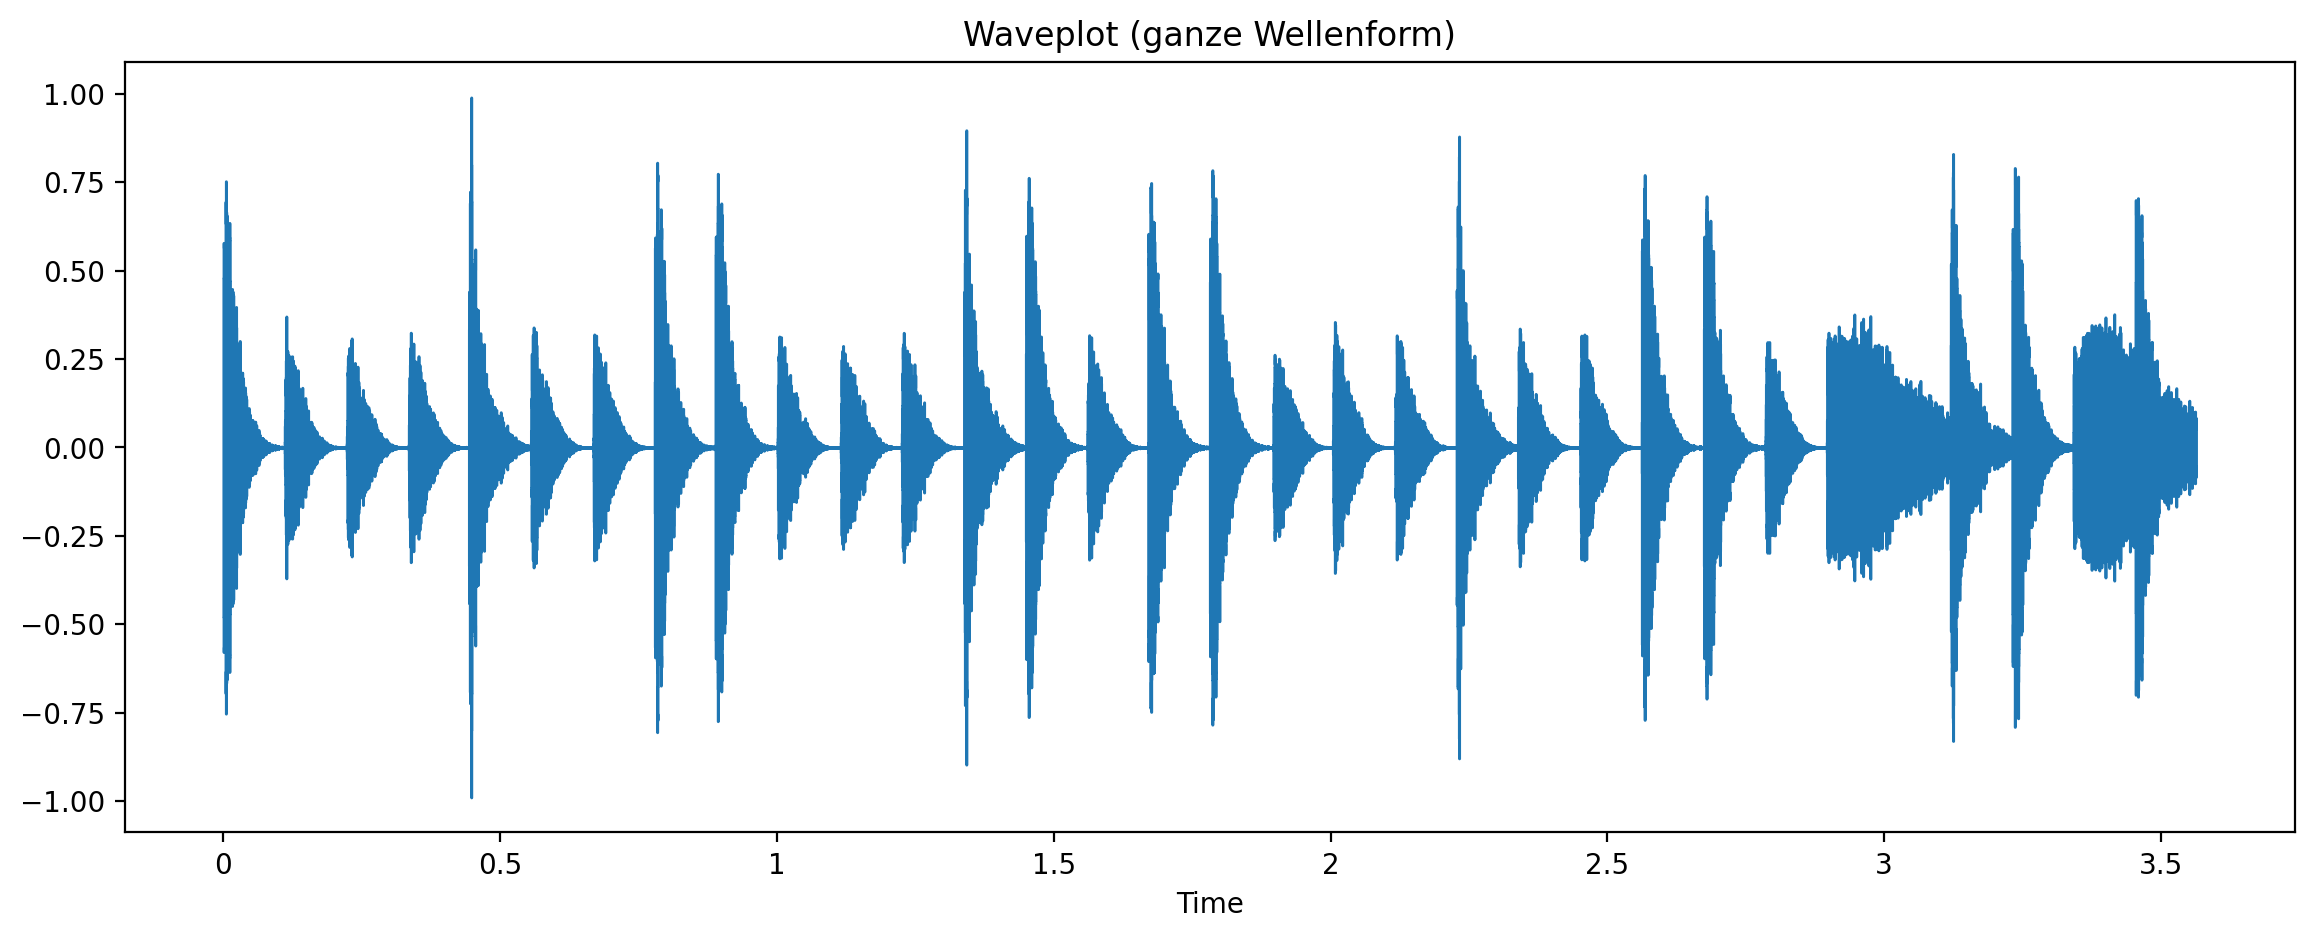

In [56]:
# Plotten Sie die Wellenform des Klangs
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sr)
plt.title("Waveplot (ganze Wellenform)")
plt.show()

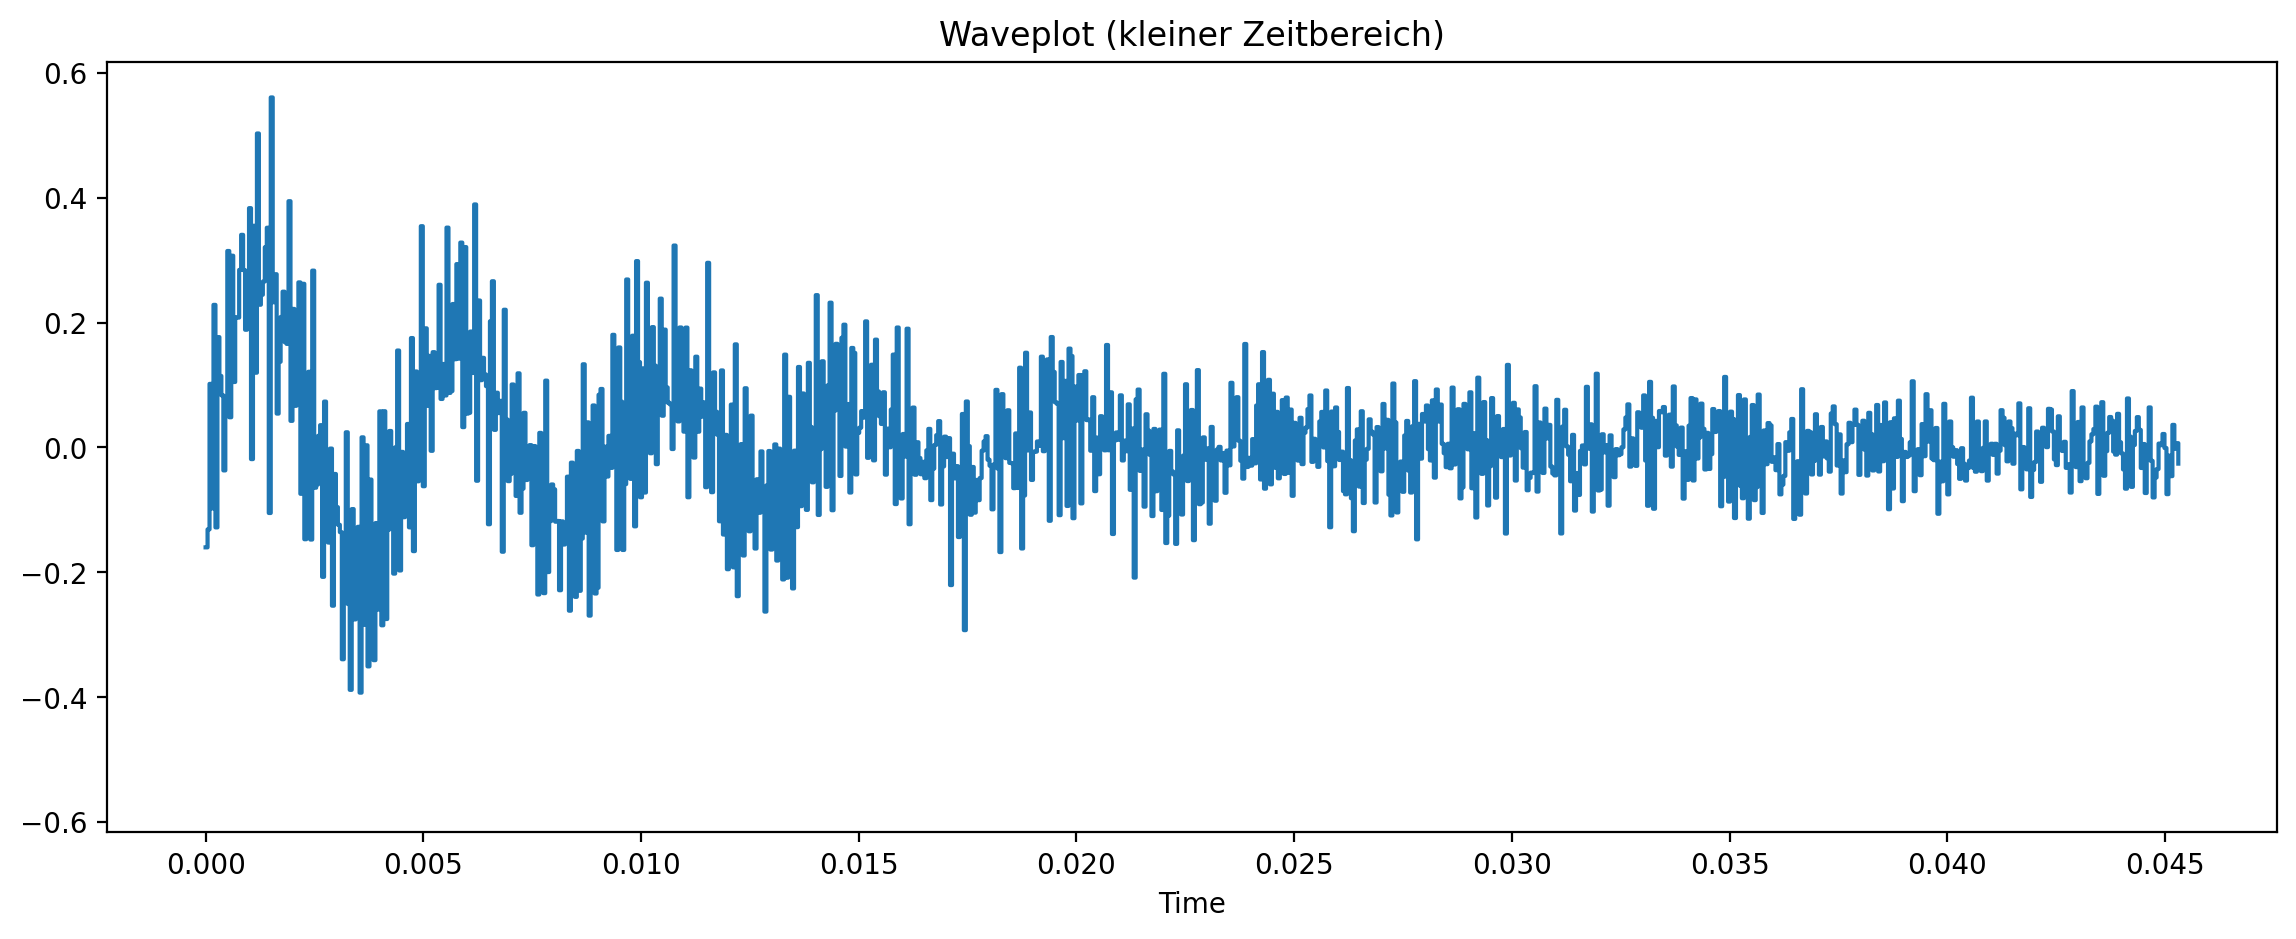

In [59]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data[10000:11000], sr=sr)
plt.title("Waveplot (kleiner Zeitbereich)")
plt.show()

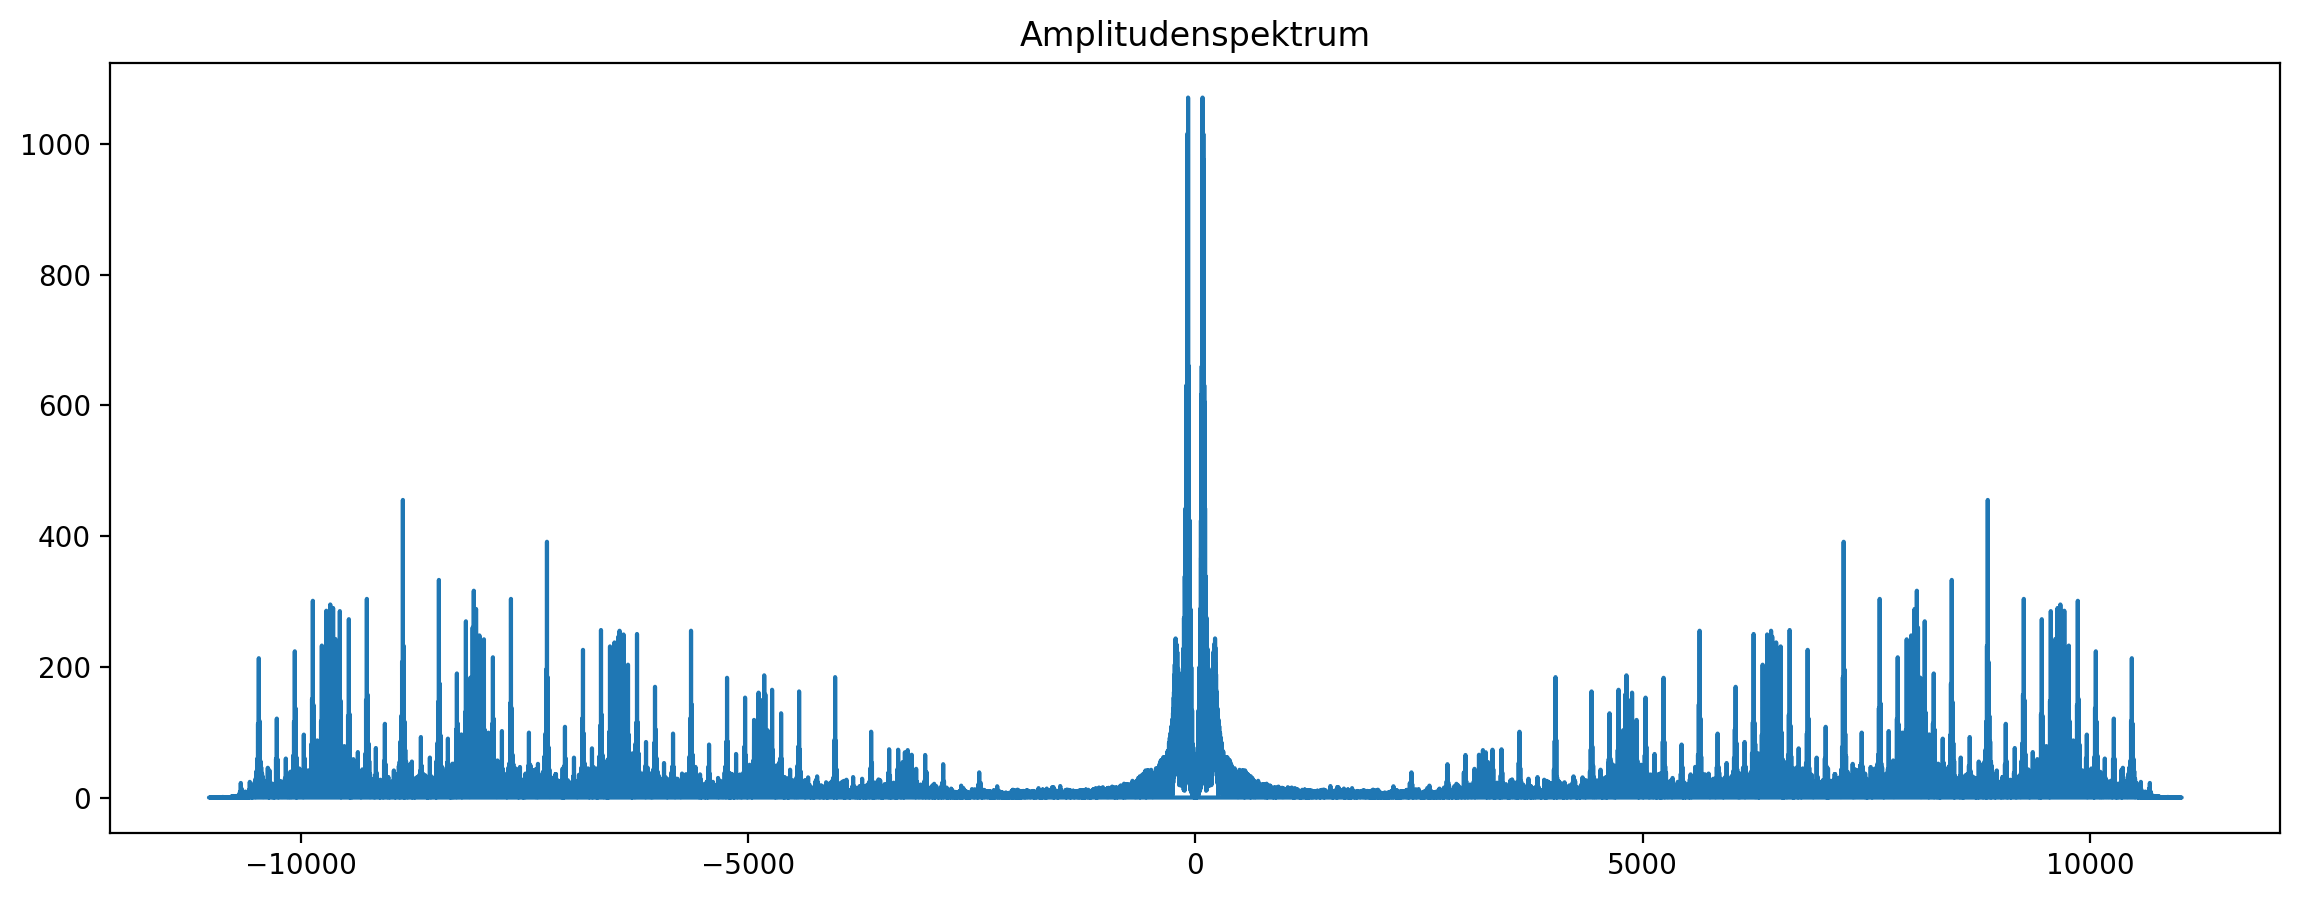

In [58]:
fft_result = scipy.fft.fft(data)
frequencies = scipy.fft.fftfreq(len(data), 1 / sr)

plt.figure(figsize=(14, 5))
plt.plot(frequencies, np.abs(fft_result))
plt.title("Amplitudenspektrum")
plt.show()

#### Warum ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?

Das Amplitudenspektrum ist symmetrisch bezüglich des Vorzeichens, weil die Fouriertransformation, die zur Berechnung des Amplitudenspektrums verwendet wird, reellwertige Funktionen in komplexe Funktionen umwandelt. Bei reellwertigen Funktionen ist der Realteil des Amplitudenspektrums gerade und der Imaginärteil ungerade. Das bedeutet, dass die Amplituden der positiven und negativen Frequenzkomponenten gleich sind, während die Phasen der negativen Frequenzkomponenten das negative Vorzeichen der Phasen der positiven Frequenzkomponenten haben ' 1.
Die Symmetrie des Amplitudenspektrums ist eine direkte Folge der Symmetrie der Fouriertransformation. Die Fouriertransformation einer reellwertigen Funktion $f(t)$ ist gegeben durch:

$$
F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} d t
$$

Da $f(t)$ reellwertig ist, gilt:

$$
F(-\omega)=\int_{-\infty}^{\infty} f(t) e^{i \omega t} d t=F^*(\omega)
$$

Das bedeutet, dass das Amplitudenspektrum, das den Betrag der Fouriertransformierten darstellt, symmetrisch bezüglich des Vorzeichens ist:

$$
|F(-\omega)|=|F(\omega)|
$$

Source:

- [tuwien](https://ti.tuwien.ac.at/cps/teaching/courses/dspv/files/DFT-FFT.pdf)


### **(b)** Trennen Sie den Sound-Signal in einen Teil oberhalb und unterhalb von 2 kHz in Frequenzen. Identifizieren Sie jeweils die Top 5 Frequenzen in diesen Frequenzbereichen.


In [82]:
positive_frequencies = frequencies > 0

mask_below_2kHz = np.abs(frequencies) < 2000 & positive_frequencies
mask_above_2kHz = np.abs(frequencies) >= 2000 & positive_frequencies

# Filtern der Frequenzbereiche unter und über 2kHz
fft_below_2kHz = fft_result * mask_below_2kHz
fft_above_2kHz = fft_result * mask_above_2kHz

# Identifizieren Sie die Top 5 Frequenzen in diesen Frequenzbereichen
top_5_freqs_below_2kHz = np.argsort(np.abs(fft_below_2kHz[positive_frequencies]))[-5:]
top_5_freqs_above_2kHz = np.argsort(np.abs(fft_above_2kHz[positive_frequencies]))[-5:]

print(
    "Top 5 Frequenzen unter 2kHz: ",
    np.sort(frequencies[positive_frequencies][top_5_freqs_below_2kHz]),
)
print(
    "Top 5 Frequenzen über 2kHz: ",
    np.sort(frequencies[positive_frequencies][top_5_freqs_above_2kHz]),
)

Top 5 Frequenzen unter 2kHz:  [ 3673.92444043  3675.32734422  3675.60792497  3675.88850573
 11024.85970962]
Top 5 Frequenzen über 2kHz:  [71.82867395 80.8072582  81.92958123 89.78584244 90.90816547]


### **(c)** Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion. Berechnen Sie den Fehler der Rekonstruktion wie in Aufgabe 1 für die gefilterten Signale und schreiben Sie die gefilterten rekonstruierten Daten in eine wav-Datei. Beschreiben und erklären Sie das Ergebnis.


In [78]:
# Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion
reconstructed_below_2kHz = scipy.fft.ifft(fft_below_2kHz).real
Audio(data=reconstructed_below_2kHz, rate=sr)


In [79]:
reconstructed_above_2kHz = scipy.fft.ifft(fft_above_2kHz).real
Audio(data=reconstructed_above_2kHz, rate=sr)


In [72]:
# Berechnen Sie den Fehler der Rekonstruktion
error_below_2kHz = rel_error(data, reconstructed_below_2kHz)
error_above_2kHz = rel_error(data, reconstructed_above_2kHz)

print("Fehler der Rekonstruktion unter 2kHz: ", error_below_2kHz)
print("Fehler der Rekonstruktion über 2kHz: ", error_above_2kHz)


Fehler der Rekonstruktion unter 2kHz:  0.57832485
Fehler der Rekonstruktion über 2kHz:  0.8158055


In [73]:
sf.write("reconstructed_below_2kHz.wav", reconstructed_below_2kHz, sr)
sf.write("reconstructed_above_2kHz.wav", reconstructed_above_2kHz, sr)


## Zusammenfassung


## Lerntagebuch


### KW 18


### KW 19


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c921941-9604-4099-90d4-1d4be742febc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>
